In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [21]:
#Reading the input file and splitting it into train and test
df_train = pd.read_csv('/Users/karunparashar/Downloads/mtx/Train_rsmpl.csv')
df = df_train.copy(deep=True)
X_resampled = df.iloc[:,0:52]
y_resampled = df.iloc[:,52]
x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled,train_size=0.8,test_size=0.2,
                                                    random_state = 7)

Building the classifier and hyper-parameter search across the classifier using RandomisedGridSearchCV

In [30]:
#defining base classifier
knc = KNeighborsClassifier()

#parameters to be tuned
param_grid_knn = {'n_neighbors':[3,5,7,9]}

#grid search initialisation
grid_knn = RandomizedSearchCV(knc, param_grid_knn,cv =2, verbose = 3,n_jobs=-1)

#training on model created using grid search
knn_model = grid_knn.fit(x_train, y_train)

#predictions based on this model
grid_predictions_knn = knn_model.predict(x_test)

#calculating accuracy
knn_acc_grid = accuracy_score(y_test,grid_predictions_knn)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:   30.6s remaining:   30.6s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   56.1s finished


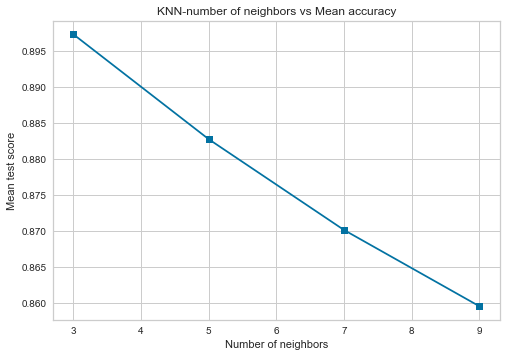

In [31]:
#visualising results based on cross validation by grid search
KNN_grid_results =grid_knn.cv_results_
plt.plot(np.array([3,5,7,9]),KNN_grid_results['mean_test_score'],marker='s')
plt.title('KNN-number of neighbors vs Mean accuracy')
plt.xlabel('Number of neighbors') 
plt.ylabel('Mean test score') 
plt.show()

Testing the created model against test resampled data

In [24]:
df_test = pd.read_csv('/Users/karunparashar/Downloads/mtx/Tst_rsmpl.csv')
x_tet =df_test.iloc[:,0:52]
y_tet = df_test.iloc[:,52]
test_pred = knn_model.predict(x_tet)
accuracy_score(test_pred,y_tet)

Extracting best tuning parameter from our trained model

In [35]:
df_kn= pd.DataFrame(data = KNN_grid_results)
best_params = df_kn.params[df_kn.rank_test_score ==1]
best_params

0    {'n_neighbors': 3}
Name: params, dtype: object

Creating a classification report based on the best parameters available

In [39]:
cr = classification_report(knn_model.predict(x_tet),y_tet)
print(cr)

               precision    recall  f1-score   support

     Ascomoid       0.84      0.87      0.85     14496
Assassin vine       0.77      0.87      0.82     13247
   Basidirond       0.94      0.93      0.93     15095
    Dark tree       0.96      0.97      0.96     14802
 Hangman tree       0.99      0.94      0.96     15883
       Kelpie       0.97      0.92      0.94     15870
      Myconid       1.00      0.95      0.97     15761

    micro avg       0.92      0.92      0.92    105154
    macro avg       0.92      0.92      0.92    105154
 weighted avg       0.93      0.92      0.92    105154



All classes have decent precision, recall and F1 scores except the class 'Assassin vine'- which implies that the model was able to capture the original distribution to a great level apart from one specific class.

Otherwise the model is on par with a good classifier